In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread
from tifffile import imsave
from skimage.util import img_as_float
from skimage.color import gray2rgb

In [2]:
folds = {}
folds['840005_0115'] = (17900, 19400, 0, 1500) # (row_min, row_max, col_min, col_max)
folds['840003_0039-1'] = (12200, 14000, 15100, 16900)
folds['840069_0048-1'] = (15500, 20500, 1500, 6500)
folds['840072_0125-1'] = (17200, 18100, 3350, 4250)
folds['840063_0110'] = (7400, 10300, 2600, 5500)
folds['840069_0053-1'] = (17500, 22600, 12200, 17300)
folds['840096_0095'] = (11100, 13600, 5350, 7850)
folds['840003_0039-2'] = (20300, 21800, 13000, 14500)
folds['840069_0048-2'] = (9600, 17100, 13100, 20600)
folds['840072_0125-2'] = (7400, 8200, 3750, 4550)
folds['840063_0110-2'] = (3100, 7400, 18000, 22300)
folds['840069_0053-2'] = (4400, 7000, 4700, 7300)

In [3]:
# output dir
save_dir = '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/bunching_artifacts_sup'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

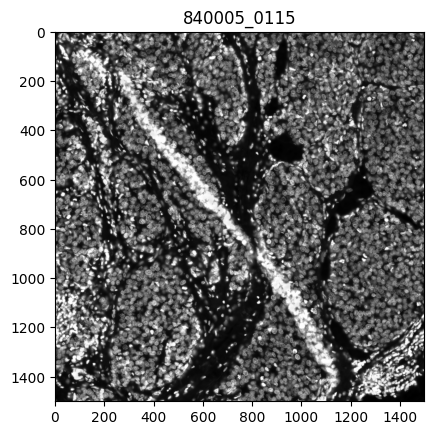

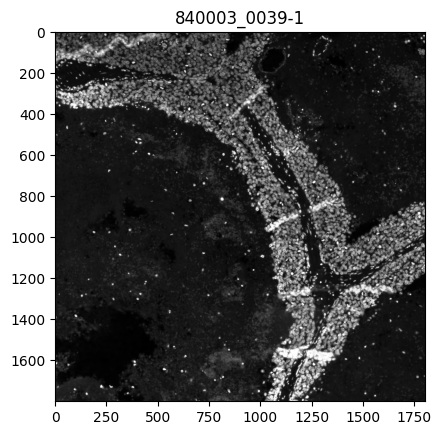

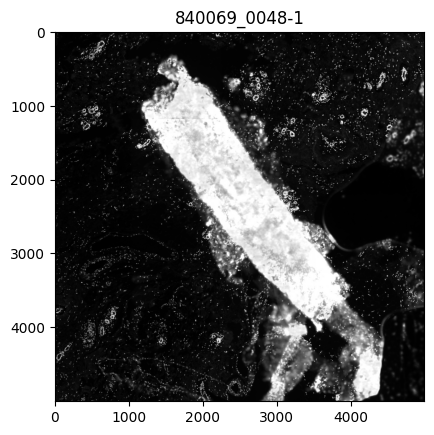

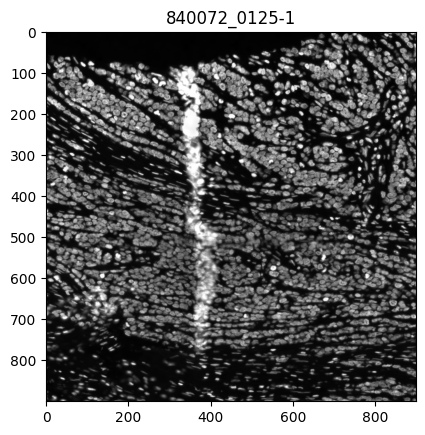

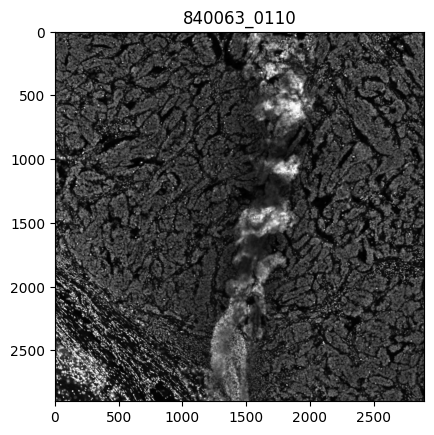

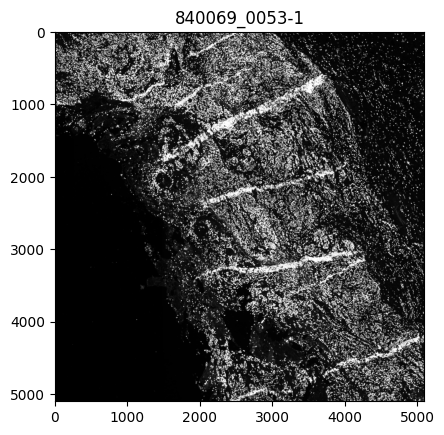

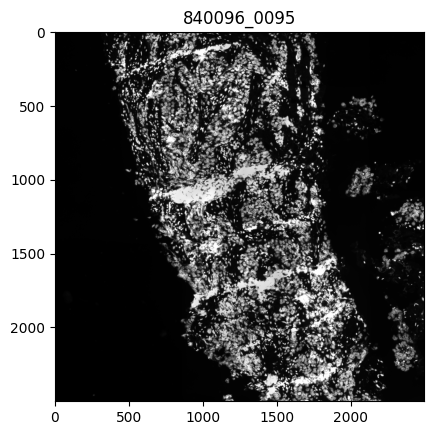

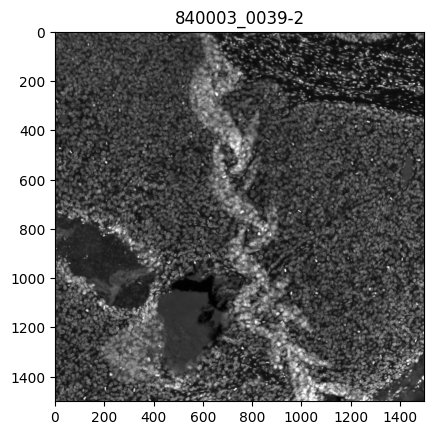

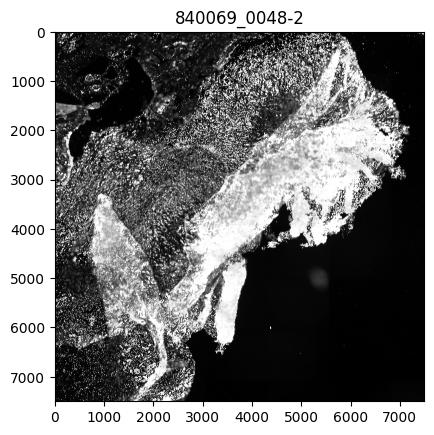

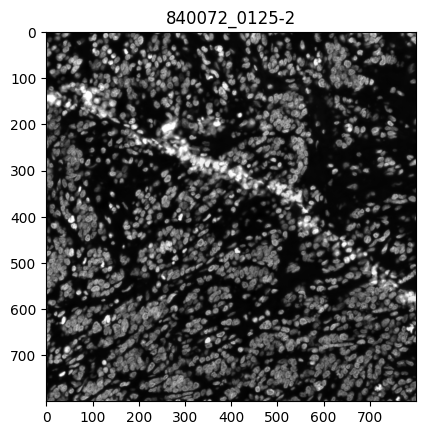

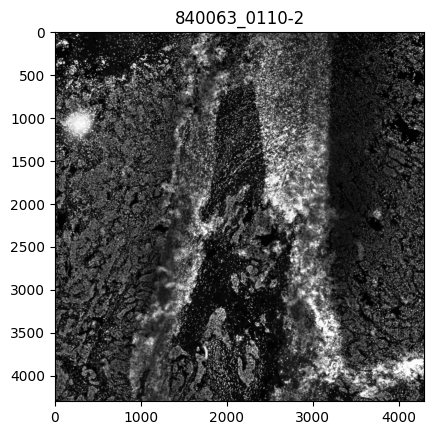

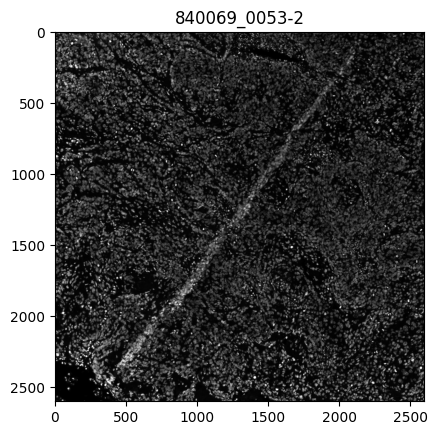

In [4]:
for k, v, in folds.items():
    
    k2 = k.split('-')[0]
    
    # assign file path to TOPACIO OME-TIFF (THIS IMAGE IS NOT BACKGROUND SUBTRACTED)
    img_path = (f'/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/{k2}.ome.tif')
    
    dna = imread(img_path, key=0)
    dna = img_as_float(dna)
    dna_crop = dna[v[0]:v[1], v[2]:v[3]]
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1
    
    bottom_cutoff = 0.0
    top_cutoff = 1.0
    dna_crop = np.clip(dna_crop, bottom_cutoff, top_cutoff)
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1

    dna_crop_rgb = gray2rgb(dna_crop)
    
    plt.imshow(dna_crop_rgb, cmap='magma')
    plt.title(k)
    plt.savefig(os.path.join(save_dir, f'{k}.png'), dpi=1000)
    plt.show()
    plt.close('all')